# Introducrtion to Machine Learning: Assignment #1
## Submission date: 28\5\2024, 23:59.
### Topics:
- Naïve bayes
- Gaussian Bayes
- Parzen Windows
- KNN

Submitted by:

 Raneem Ibraheem 212920896

 Selan Abu Saleh 212111439

**Assignment Instruction:**

· Submissions in pairs only.

· Try to keep the code as clean, concise, and short as possible

· If you wish to work in your IDE, you can, but you **must**,  insert the script back to the matching cells of the notebook and run the code. <br/>Only the notebook will be submitted in moodle (in `.ipynb` format).

· <font color='red'>Please write your answers to question in red</font>.

**Important:** All plots, results and outputs should be included in the notebook as the cells' outputs (run all cells and do not clear the output). <br/>

**Important:** Your submission must be entirely your own. Any attempts of plagiarism (including ChatGPT) will lead to grade 0 and disciplinary actions.


## Customizing Colab
This is an optional section for you convenience:<br/>
Go to Tools -> Settings -> editor<br/>
There, you can adjust fonts, add line numbers, change indentations.

## Question 1 - Bayesian Classification Assuming Gaussian distribution
You are requested by the Central Bank of America to detect between three types of bankotes: fake, fine, and good. The dataset consists of 5 features which were obtained from the digitized images of banknotes.<br/>
Since the data is continuous, you will implement Gaussian bayes and compare to Gaussian naïve bayes.




import libraries

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Load the wine dataset from https://sharon.srworkspace.com/ml/datasets/hw1/banknote_authentication.csv

In [33]:
# Implement here
df = pd.read_csv('https://sharon.srworkspace.com/ml/datasets/hw1/banknote_authentication.csv')
print(df.shape)
df.head(10)

(600, 6)


,contrast,skew,curtosis,heat,cent_col,Class
0,2.446909,2.702995,0.832495,0.531505,-1.734316,0
1,0.870104,2.248493,-1.496408,1.383379,-1.216271,0
2,-1.930227,-2.708964,1.031232,-0.125341,0.683788,2
3,-1.503410,-2.555582,0.838071,-0.691761,1.242841,2
4,-1.027548,-3.375373,0.502047,-1.860655,3.321754,2
5,0.607669,-0.668726,0.653557,-0.539476,1.060485,2
6,0.137887,-1.338049,0.264780,0.714120,1.272975,1
7,1.690845,2.363459,-0.431590,0.657613,-1.132438,0
8,1.462724,2.909887,-0.277218,-0.734254,-1.627782,0
9,-0.118807,-0.998353,0.027847,-0.023366,1.063166,1


Check if there is even potential for gaussian assumption to work here, by plotting the density of the features (without target label!), using plotting for data frames. <br/>
Should gaussian bayes work here? <br/>
<font color='red'>Write here your answer and explain it</font>
<p>Well, as we can see from the graphs down below and fromt he input that we have, that the data is following a gaussian distrepution to some degree, therefore it is safe to assume that we can use the gaussian bayes method in here</p>

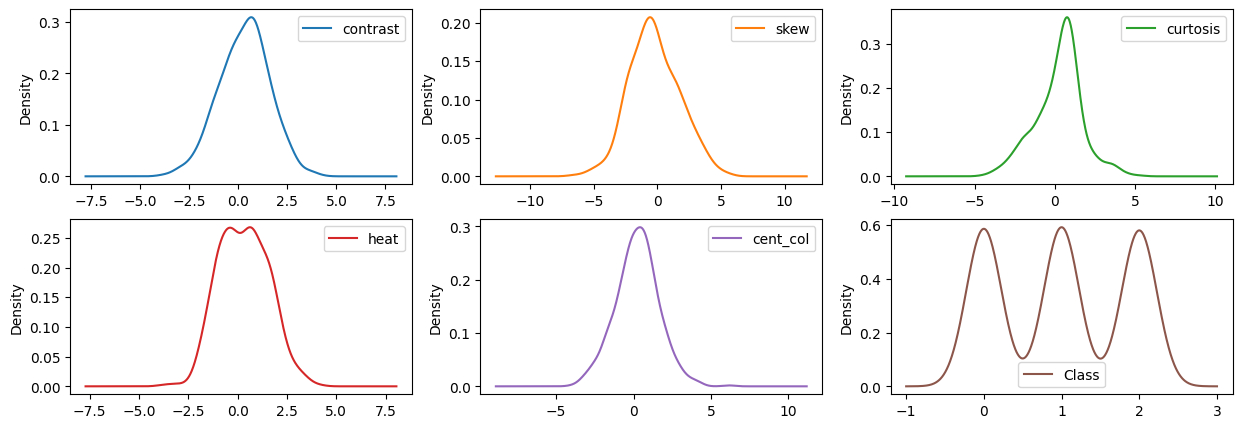

In [34]:
df.plot(kind='density', subplots=True, layout=(2,3), figsize=(15, 5), sharex=False)
plt.show()

Convert the data to numpy and split the data to 80% training and 20% test with random state of 33. Make sure to maintain the dataset balanced, using stratify=y, in train_test_split method.
<br/>Note that the data frame currently includes the labels as well.

In [35]:
# Implement here
df2 = df #we will use this later, bear with me
data = df.values #we convert the dataset to a numpy array.

X= data[:,:-1] #we extract the all the rows and columns except for the last one which are the target.
Y= data[:,-1] #we extract all the values from the last column of the array which will be the target.

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=33, stratify=Y) #now we have features that are in X and Classes that are in Y.
#and we split them into training and testing sets, then we reserve 20% of the data for the testing set and the remaining 80% will be for training.
#the random state will be a parameter that controls the number generator used to shuffle the data before splitting it.
#the stratify balances the dataset by having the same proportion of class labels as the input dataset in the training and testing datasets.

Implement the functions below. <br/>Both get test data $X\in\mathbb{R}^{n\times d}$ and returns the predicted classes (vector sized n), but the naïve bayes assumes that the features are independent.<br/>
Hint for efficient implementation: you don't need more than one loop, use numpy!

In [36]:
class_data = {i: x_train[y_train == i] for i in np.unique(y_train)}

mean_list = {i: np.mean(data, axis=0) for i, data in class_data.items()}

cov_matrix_list_gauss = {i: np.cov(data, rowvar=False) for i, data in class_data.items()}

var_list = {i: np.var(data, axis=0) for i, data in class_data.items()}

prior_probabilities = {i: len(data) / len(y_train) for i, data in class_data.items()}

def classify_point_gaussian_bayes(test_data):
    predictions = []

    for point in test_data:
        likelihoods = {}
        for category in np.unique(y_train):
            mean = mean_list[category]
            cov_matrix = cov_matrix_list_gauss[category]
            prior_prob = prior_probabilities[category]

            diff = point - mean
            likelihood = (1 / ((2 * np.pi) ** (len(point) / 2) * np.linalg.det(cov_matrix) ** 0.5)) * \
                          np.exp(-0.5 * diff.T @ np.linalg.inv(cov_matrix) @ diff)

            likelihoods[category] = likelihood * prior_prob

        predicted_category = max(likelihoods, key=likelihoods.get)
        predictions.append(predicted_category)

    return np.array(predictions)

def classify_point_gaussian_naive_bayes(test_data):
  log_likelihoods = {}

  for category in np.unique(y_train):
      mean = mean_list[category]
      var = var_list[category]
      prior_prob = prior_probabilities[category]

      log_feature_likelihoods = -0.5 * ((test_data - mean) ** 2) /var -0.5* np.log(2 * np.pi * var)

      log_likelihood = np.sum(log_feature_likelihoods)

      log_likelihoods[category] = log_likelihood + np.log(prior_prob)

  predicted_category = max(log_likelihoods, key=log_likelihoods.get)
  return predicted_category

For both GB and GNB, we will look at train vs test. Answer the following:
- Which model achieved better learning? Why?
- Could the other model be sometimes better? How, for example?
<br/>
<font color='red'>Write here your answers and explain</font>
<br/>
The results show that the GB classifier performed better than the GNB classifier, because the features were correlated, hence the better performance by the GB classifier.
<br/>
The GNB classifier could perform better in special cases, like the case where all the features are independent.
<br/>Hint: Use the next section, for visualization the correlation matrix on the train.  


In [37]:
# Reminder: success rate is the precentage of correctly classified data within the number of all data in the test set.

dict1 = {'GB': [], 'GNB': []}

accs = classify_point_gaussian_bayes(x_train)
dict1['GB'].append(np.count_nonzero(accs == y_train) / len(y_train))

accs = classify_point_gaussian_bayes(x_test)
dict1['GB'].append(np.count_nonzero(accs == y_test) / len(y_test))

accs = classify_point_gaussian_naive_bayes(x_train)
dict1['GNB'].append(np.count_nonzero(accs == y_train) / len(y_train))

accs = classify_point_gaussian_naive_bayes(x_test)
dict1['GNB'].append(np.count_nonzero(accs == y_test) / len(y_test))

df = pd.DataFrame(dict1, columns=['GB', 'GNB'], index=['train', 'test'])
print(df)

             GB       GNB
train  0.660417  0.337500
test   0.650000  0.333333


Its not enough! We want to get even better test results. <br/>
Please look at the train correlation matrix.
- Choose one feature to remove and explain why you chose it.
- If we continue to remove features, what do you expect to happend with the train error?

<font color='red'>Write here your answers and explain them</font>
<br/>
I tested all the features, and they all gave me the same result, hence i picked a random feature and just removed it, but i found out that when we start to remove more and more features, the error increases and the accuracy decreases for the testing and the training.

In [38]:
# Implement here. you may use the code from the tutorial.
# You can obtain the correlation matrix using numpy
X_modified = df2.drop(columns=['heat','skew', 'contrast', 'Class']).values
x_train_mod, x_test_mod, y_train_mod, y_test_mod = train_test_split(
    X_modified, Y, test_size=0.2, random_state=33, stratify=Y)

class_data_mod = {i: x_train_mod[y_train_mod == i] for i in np.unique(y_train_mod)}

mean_list_mod = {i: np.mean(data, axis=0) for i, data in class_data_mod.items()}

cov_matrix_list_gauss_mod = {i: np.cov(data, rowvar=False) for i, data in class_data_mod.items()}

var_list_mod = {i: np.var(data, axis=0) for i, data in class_data_mod.items()}

prior_probabilities_mod = {i: len(data) / len(y_train_mod) for i, data in class_data_mod.items()}

def classify_point_gaussian_bayes_mod(test_data_mod):
    predictions = []

    for point in test_data_mod:
        likelihoods = {}
        for category in np.unique(y_train_mod):
            mean = mean_list_mod[category]
            cov_matrix = cov_matrix_list_gauss_mod[category]
            prior_prob = prior_probabilities_mod[category]

            diff = point - mean
            likelihood = (1 / ((2 * np.pi) ** (len(point) / 2) * np.linalg.det(cov_matrix) ** 0.5)) * \
                          np.exp(-0.5 * diff.T @ np.linalg.inv(cov_matrix) @ diff)

            likelihoods[category] = likelihood * prior_prob

        predicted_category = max(likelihoods, key=likelihoods.get)
        predictions.append(predicted_category)

    return np.array(predictions)

def classify_point_gaussian_naive_bayes_mod(test_data_mod):
  log_likelihoods = {}

  for category in np.unique(y_train_mod):
      mean = mean_list_mod[category]
      var = var_list_mod[category]
      prior_prob = prior_probabilities_mod[category]

      log_feature_likelihoods = -0.5 * ((test_data_mod - mean) ** 2) /var -0.5* np.log(2 * np.pi * var)

      log_likelihood = np.sum(log_feature_likelihoods)

      log_likelihoods[category] = log_likelihood + np.log(prior_prob)

  predicted_category = max(log_likelihoods, key=log_likelihoods.get)
  return predicted_category

Adjust the data according to your decision and print again the train and test for both models.

In [39]:
# Change here the train and the test according to the feature you chose to remove

dict1 = {'GB': [], 'GNB': []}

accs = classify_point_gaussian_bayes_mod(x_train_mod)
dict1['GB'].append(np.count_nonzero(accs == y_train_mod) / len(y_train_mod))

accs = classify_point_gaussian_bayes_mod(x_test_mod)
dict1['GB'].append(np.count_nonzero(accs == y_test_mod) / len(y_test_mod))

accs = classify_point_gaussian_naive_bayes_mod(x_train_mod)
dict1['GNB'].append(np.count_nonzero(accs == y_train_mod) / len(y_train_mod))

accs = classify_point_gaussian_naive_bayes_mod(x_test_mod)
dict1['GNB'].append(np.count_nonzero(accs == y_test_mod) / len(y_test_mod))

df = pd.DataFrame(dict1, columns=['GB', 'GNB'], index=['train', 'test'])
print(df)

             GB       GNB
train  0.720833  0.337500
test   0.683333  0.333333


Run the boundaries plotting for (scaled) train and test with gaussian bayes.<br/>It will show the decision boundaries as saw in the lectures.

In [40]:
# Essential for the visualization

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [41]:
#@title Train Decision Boundaries of Gaussian Naive Bayes (2D)

from sklearn.decomposition import PCA
from tqdm import tqdm

# Reduce the dimensionality of the data to 2 using PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(x_train)

# Create a grid of points for visualization in the reduced 2D space
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Use the GNB model to predict class labels for the grid points in the original 13D space
grid_points = pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()])
print(grid_points.shape)
Z = classify_point_gaussian_naive_bayes(grid_points)
Z = Z.reshape(xx.shape)

# Plot the decision boundaries and the data points in the reduced 2D space
plt.contourf(xx, yy, Z, alpha=0.8)
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_train, cmap=plt.cm.RdYlBu)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add a legend
handles, labels = scatter.legend_elements()
plt.legend(handles, labels, title='Classes')

plt.title('Train Decision Boundaries of Gaussian Naive Bayes (2D)')
plt.show()

(10353, 5)


ValueError: cannot reshape array of size 1 into shape (87,119)

In [ ]:
#@title Train Decision Boundaries of Gaussian Naive Bayes (2D)

from sklearn.decomposition import PCA
from tqdm import tqdm

# Reduce the dimensionality of the data to 2 using PCA
X_reduced = pca.transform(x_test)

# Create a grid of points for visualization in the reduced 2D space
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Use the GNB model to predict class labels for the grid points in the original 13D space
grid_points = pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()])
print(grid_points.shape)
print("\n")
Z = classify_point_gaussian_naive_bayes(grid_points)
Z = Z.reshape(xx.shape)

# Plot the decision boundaries and the data points in the reduced 2D space
plt.contourf(xx, yy, Z, alpha=0.8)
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_test, cmap=plt.cm.RdYlBu)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add a legend
handles, labels = scatter.legend_elements()
plt.legend(handles, labels, title='Classes')

plt.title('Test Decision Boundaries of Gaussian Naive Bayes (2D)')
plt.show()

(7524, 5)


1.0


ValueError: cannot reshape array of size 1 into shape (76,99)

## Question 2 - Naive Bayes

In this problem, you’ll implement a basic Naïve Bayes classifier, and use it to predict an emotion by description. <br/>
You will have to classify the sentences into 6 categories, <b>but could be any number.</b><br/>
The categories are {'sadness', 'joy', 'love', 'fear', 'anger', 'ambiguous'}. <br/>

<b>Warning:</b> I haven't personally looked at all the data here. Even though the data is taken from a ML databases site, accept my apologies if there are any offensive sentence.


import libarires

In [ ]:
import numpy as np
import pandas as pd
import math
from sklearn.feature_extraction.text import CountVectorizer

Implement the function. It reads all tweets from file and returns the following data structures: <br/>
•	texall - list of documents; each entry corresponds to a tweet which is list of words. <br/>
•	lbAll list of tweets' labels.<br/>
•	voc - set of all distinct words in the file.<br/>
•	cat - set of tweets categories.


In [ ]:
def readTrainData(file_name):
  df = pd.read_csv(file_name)
  # Implement here
  return texAll, lbAll, voc, cat

Implement the function, which computes and returns the probabilities (on the train set):<br/>
- $P_w$ - a matrix of class-conditional probabilities, $p(x|w_i)$
- $P$ - a vector of class priors, $p(w_i)$

Make sure you deal with the case of word that appears in voc but not in class $w$.

In [ ]:
def learn_NB_text():
  # Implement here
	return Pw, P

Implement fhe function that classifies all tweets from the test set and computes the success rate.<br/>
Iterate over all tweets of test and for each tweet find the most probable category.
<br/><br/>
Note1: Multiplying lots of probabilities, which are between 0 and 1, can result in floating-point underflow. Since log(xy) = log(x) + log(y), it is better to perform all computations by summing logs of probabilities rather than multiplying probabilities. <br/>Class with highest final un-normalized log probability score is still the most probable.


In [ ]:
def ClassifyNB_text(Pw, P):
	# Implement here
  print("hello")

Read the files

In [ ]:
TRAIN_FILE = 'https://sharon.srworkspace.com/ml/datasets/hw1/emotions_train.csv'
TEST_FILE = 'https://sharon.srworkspace.com/ml/datasets/hw1/emotions_test.csv'

texAll_train, lblAll_train, voc, cat = readTrainData(TRAIN_FILE)

# cats must be the same at train and test
# voc of test is irrelevant - we already trained on other voc.
texAll_test, lblAll_test, _, __ = readTrainData(TEST_FILE)

Train the model, classify it on the test and report the success rate

In [ ]:
Pw, P = learn_NB_text()
sum_right = ClassifyNB_text(Pw, P)
print(sum_right)

## Question 3 - KNN
You want to detect stars into 6 types of stars by measuring their properties. <br/> NASA gave you their dataset, including temperature, color, Spectral_Class and more. <br/> In addition, you aim to compare different distance metric to determine which one is the best for this data.

import libaries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Load the data, print the first three rows<br/>
https://sharon.srworkspace.com/ml/datasets/hw1/Stars.csv

In [ ]:
# Implement here

Convert categorial features to discerete values

In [ ]:
colors = df['Color'].unique()
for idx, color in enumerate(colors):
  df['Color'] = df['Color'].replace({color: idx})

spec_class = df['Spectral_Class'].unique()
for idx, spec in enumerate(spec_class):
  df['Spectral_Class'] = df['Spectral_Class'].replace({spec: idx})
df.head(3)

Check the correlation matrix between the features. <br/>
Which distance metric do you expect to work better: Euclidean distance, of the Mahalanobis distance? <br/>
<font color='red'>Write here your answer and explain it</font>

In [ ]:
# Implement here

Split the data to 90% train and 10% test, with random state 42. <br/>
Afterwards, split the train into 80% train and 20% validation, also with random state of 42<br/>
Make sure to maintain the dataset balanced, using stratify=y, in train_test_split method. <br/> You can check the balance using df.value_counts().

In [ ]:
# Implement here

Implement the function 'Euclidian'. <br/>
This function gets train and test datasets ($m\times d, n\times d$) and returns the distance metric sized $m \times n$, based on euclidian distance metric


In [ ]:
def Euclidean(test, data):
  # Implement here
  print("hello")

def Mahalanobis(test, data):
  distances = np.zeros((test.shape[0], data.shape[0]))
  covariance_matrix_data = np.cov(data, rowvar=False)

  # Calculate the Mahalanobis distances
  for i in range(test.shape[0]):
      for j in range(data.shape[0]):
          diff =  test[i] - data[j]
          distances[i, j] = np.sqrt(np.dot(np.dot(diff, np.linalg.inv(covariance_matrix_data)), diff.T))
  return distances

Implement the function kNN_classify that returns array sized m, which are the predictions for the m test samples.

In [ ]:
def kNN_classify(data, labels, test, k, metric='Euclidian'):
  arguments = (test, data)
  distances = eval(f'{metric}(*arguments)')   #returns np[][] |test| X |data| by the given metric.
  # Implement here

Look at the plots for different k values. Note that the Mahalanobis distance metric is already implemented to you above. <br/>Run the following code and compare the performance of Mahalanobis vs Euclidian, specifically as function of k. <br/>
<font color='red'>Write here your answer and explain it</font>

In [ ]:
metrics = ['Euclidean', 'Mahalanobis']
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

for idx, metric in enumerate(metrics):

  ks = np.arange(1, 41, 2)
  accs = []
  for k in ks:
    c = kNN_classify(X_train, y_train, X_test, k, metric)
    accs.append()   # Implement here

  axs[idx % 2].plot(ks, accs, color='red')
  axs[idx % 2].set_xlabel('k')
  axs[idx % 2].set_ylabel('accuracy')
  axs[idx % 2].set_title(metric)
  axs[idx % 2].set_xticks(ks)
plt.show()

Now, we implement the $L_p$ norm distance metric. Reminder:
$$ d(x,y)=||x-y||_p=\left(\sum_{i=1}^d |x_i-y_i|^p\right)^{\frac{1}{p}} $$
Remark: $L_1$ is the Manhattan distance and $L_2$ is the Euclidian.

In [ ]:
def Minkowski(test, data, p):
  # Implement here
  print("hello")

Find the hyperparameter p that fits best to this problem (between 1-10)

In [ ]:
# Implement here

For that p, print the accuracy on the test as function of k. Is it really better  than the first two matrices? <br/>
<font color='red'>Write here your answer and explain it</font>

In [ ]:
ks = np.arange(1, 30, 2)
accs = []
best_p = None       # You may change the usage of p according to your previous implementation

for k in ks:
    c = kNN_classify(X_train, y_train, X_test, k, 'Minkowski')
    accs.append()   # Implement here

plt.plot(ks, accs)
plt.xticks(ks)
plt.show()

### Thats it!
If you choose to continue, 5 pts bonus!

We are going to classify the fashion MNIST data.<br/>
First, load the the train and test from:
- https://sharon.srworkspace.com/ml/datasets/hw1/fashion-mnist_train.csv
- https://sharon.srworkspace.com/ml/datasets/hw1/fashion-mnist_test.csv

Seconly, convert it to numpy and obtain the train and test data & labels

In [ ]:
# Implement here

dispaly some random image

In [ ]:
idx = np.random.randint(len(X_train))
plt.imshow(X_train[idx].reshape(28,28), cmap='gray')
plt.show()

Use some google to search for appropriate distance metric that should classify correctly images. From what you read, explain yourselves, why is it a good distance metric?<br/>
<font color='red'>Write here your answer and explain it</font>

Now, use the sklearn package of KNN with the metric you chose and print a graph of accuracy on the test, as function of k.<br/>
Were you correct?

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Implement here

## Question 4 - Parzen Windoes
See attached PDF in Moodle